<a href="https://colab.research.google.com/github/jjon215/MLHW_2/blob/master/First_Arch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/1
40000/40000 [==============================] - 25s 630us/step - loss: 1.8945 - acc: 0.2885
Epoch 1/1
40000/40000 [==============================] - 25s 619us/step - loss: 1.5965 - acc: 0.4095
Epoch 1/1
40000/40000 [==============================] - 27s 671us/step - loss: 1.4726 - acc: 0.4604
Epoch 1/1
40000/40000 [==============================] - 25s 614us/step - loss: 1.3779 - acc: 0.4968
Epoch 1/1
40000/40000 [==============================] - 27s 667us/step - loss: 1.3118 - acc: 0.5278
Epoch 1/1
40000/40000 [==============================] - 24s 590us/step - loss: 1.2423 - acc: 0.5548
Epoch 1/1
40000/40000 [==============================] - 23s 577us/step - loss: 1.1983

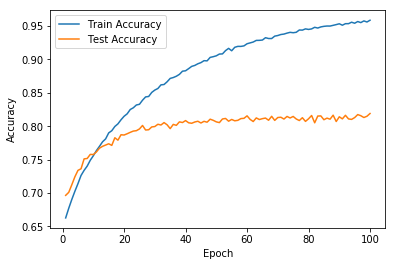

Validation Loss is : 0.7496384120941162
Validation Accuracy is : 0.819


In [0]:

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt

batch_size = 32
num_classes = 10
epochs = 100
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train = list(x_train)
y_train = list(y_train)

val_loss = list()
val_acc = list()

x_val = np.array(x_train[4*10000:(4+1)*10000])
y_val = np.array(y_train[4*10000:(4+1)*10000])
  
x_tra = np.array(x_train[0:4*10000]+x_train[(4+1)*10000:50000])
y_tra = np.array(y_train[0:4*10000]+y_train[(4+1)*10000:50000])
  
  
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])

datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False, 
        zca_whitening=False,  
        zca_epsilon=1e-06, 
        rotation_range=0, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.,  
        zoom_range=0., 
        channel_shift_range=0., 
        fill_mode='nearest',
        cval=0.,  
        horizontal_flip=True,  # flip images
        vertical_flip=False,  # images
        # applying rescaling factor
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

datagen.fit(x_tra)

for e in range(10):
    batches = 0
    for x_batch, y_batch in datagen.flow(x_tra, y_tra, batch_size=40000):
        model.fit(x_batch, y_batch)
        batches += 1
        if batches >= 1:
            break

History = model.fit(x_tra, y_tra,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val, y_val))
score = model.evaluate(x_val, y_val, verbose=0)
print('Test Loss is :', score[0])
print('Test Accuracy:', score[1])
print(score)
print(History.history)

plotaccuracy = plt.plot(range(1,epochs+1),History.history['acc'],range(1,epochs+1),History.history['val_acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(('Train Accuracy','Test Accuracy'))
plt.show(plotaccuracy)

print('Validation Loss is :',History.history['val_loss'][-1])
print('Validation Accuracy is :',History.history['val_acc'][-1])